In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
#/Users/azakaria/Downloads/nightowls_validation.json
dataDir='/Users/azakaria/Downloads'
dataFile='nightowls_validation'
annFile=f'{dataDir}/{dataFile}.json'
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.24s)
creating index...
index created!


In [2]:
imgIds = coco.getImgIds()
img = coco.loadImgs(imgIds)[0]
print(img['id'])
annIds = coco.getAnnIds(imgIds=img['id'])
anns = coco.loadAnns(annIds)
print(anns)

7000000
[{'occluded': False, 'difficult': False, 'bbox': [349, 227, 20, 41], 'id': 7000000, 'category_id': 1, 'image_id': 7000000, 'pose_id': 1, 'tracking_id': 7000000, 'ignore': 0, 'area': 820, 'truncated': False}, {'occluded': False, 'difficult': False, 'bbox': [645, 239, 21, 40], 'id': 7000001, 'category_id': 1, 'image_id': 7000000, 'pose_id': 1, 'tracking_id': 7000001, 'ignore': 0, 'area': 840, 'truncated': False}]


1020


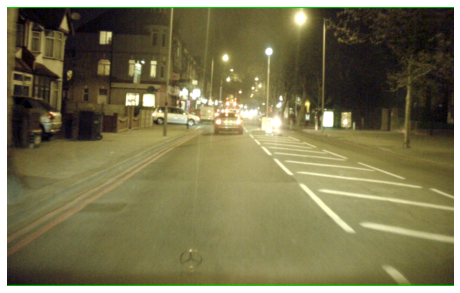

{'occluded': False, 'difficult': False, 'bbox': [-1, 204, 66, 142], 'id': 7000119, 'category_id': 1, 'image_id': 7000052, 'pose_id': 1, 'tracking_id': 7000000, 'ignore': 0, 'area': 9372, 'truncated': False}
True


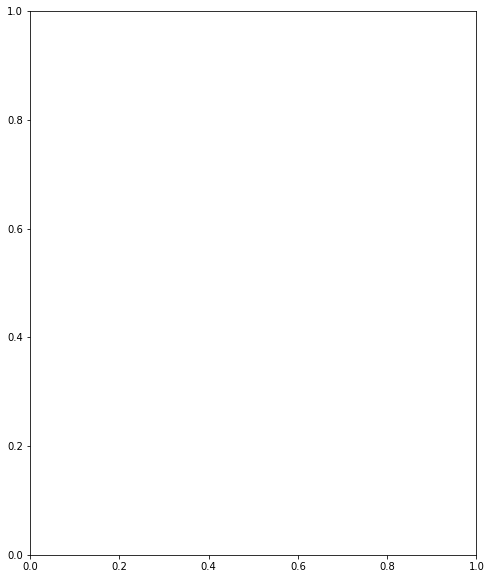

In [14]:
annIds = coco.getAnnIds()
#print(annIds)
anns = coco.loadAnns(annIds)
negative_bbox_annotations = []
imgIds = coco.getImgIds()
for ann in anns:
    for bbox_val in ann['bbox']:
        if bbox_val < 0:
            #This is throwing a keyerror
            if ann['id'] in imgIds:
                negative_bbox_annotations.append({'ann': ann,'img':coco.loadImgs(ann['id'])[0]})
"""
for ann in negative_bbox_annotations:
    print(ann['ann'])
    print(ann['img'])
"""
print(len(negative_bbox_annotations))
#print(len(anns))
#s = [a for a in anns if 'segmentation' in a]
#print(negative_bbox_annotations[0])
#print('bbox' in [negative_bbox_annotations[0]['ann']][0])

filename = negative_bbox_annotations[0]['img']['file_name']
imgPath = f'/Users/azakaria/Downloads/nightowls_validation/{filename}'
#print([negative_bbox_annotations[0]['ann']][0])
I = io.imread(imgPath)
#print(negative_bbox_annotations[0]['img']['file_path'])
#print(negative_bbox_annotations[0]['img'])
plt.imshow(I); plt.axis('off'); plt.show()
print(negative_bbox_annotations[0]['ann'])
coco.showAnns([negative_bbox_annotations[0]['ann']], draw_bbox=True)

#"bbox": [x,y,width,height], (COCO)
#x_center y_center width height (YOLO)

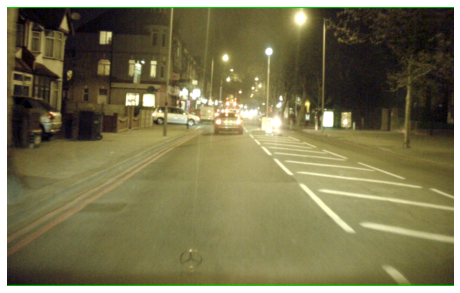

KeyError: 0

In [36]:

imgPath = f'/Users/azakaria/Downloads/nightowls_validation/{img["file_name"]}'
I = io.imread(imgPath)
plt.axis('off')
plt.imshow(I)
plt.show()
coco.showAnns(ann, draw_bbox=True)